In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Coloca a precisão de float com 2 casas para praticidade
pd.set_option("display.precision", 2)

# Lê o dataset
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

# Vamo pegar os primeiros 5% do dataset pra fazer uma análise 
analysis_cutoff = int(df.shape[0] * 0.05)
ana = df.sample(analysis_cutoff, random_state=42, axis=0)

ana.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
132821,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
239235,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


In [2]:
df.shape

(253680, 22)

In [3]:
ana.shape

(12684, 22)

In [4]:
ana.isnull().sum().to_frame()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [5]:
# Pega as colunas que possuem valores inteiro para análise
int_cols = ana[["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]]
desc = int_cols.describe()

# Deixa o dataframe mais bonitinho pro relatório
desc.drop(["count"], axis=0, inplace=True)
desc.index = ["Média", "Desvio Padrão", "Valor Mínimo", "25% dos Valores", "50% dos Valores", "75% dos Valores", "Valor Máximo"] 
desc


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
Média,28.46,2.51,3.15,4.19,8.01,5.06,6.06
Desvio Padrão,6.47,1.07,7.31,8.71,3.05,0.98,2.07
Valor Mínimo,12.00,1.00,0.00,0.00,1.00,1.00,1.00
25% dos Valores,24.00,2.00,0.00,0.00,6.00,4.00,5.00
50% dos Valores,27.00,2.00,0.00,0.00,8.00,5.00,7.00
75% dos Valores,31.00,3.00,2.00,3.00,10.00,6.00,8.00
Valor Máximo,95.00,5.00,30.00,30.00,13.00,6.00,8.00


/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


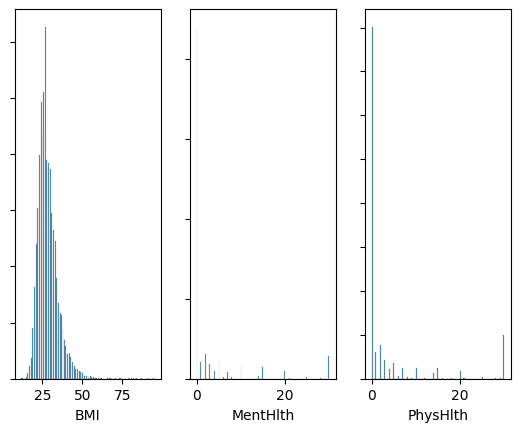

In [11]:
fig, axs = plt.subplots(ncols=3)

sns.histplot(ana["BMI"], ax=axs[0]).set(ylabel=None, yticklabels=[])
sns.histplot(ana["MentHlth"], ax=axs[1]).set(ylabel=None, yticklabels=[])
sns.histplot(ana["PhysHlth"], ax=axs[2]).set(ylabel=None, yticklabels=[]);

/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


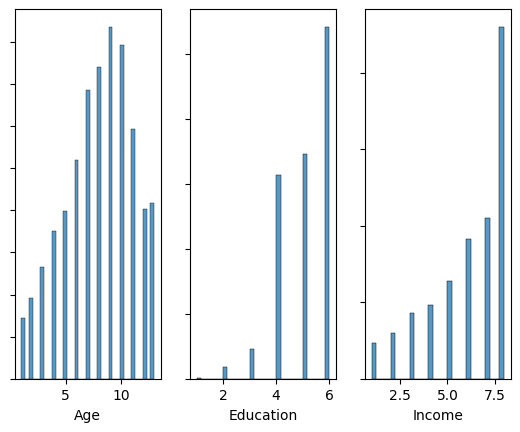

In [17]:
fig, axs = plt.subplots(ncols=3)

sns.histplot(ana["Age"], ax=axs[0]).set(ylabel=None, yticklabels=[])
sns.histplot(ana["Education"], ax=axs[1]).set(ylabel=None, yticklabels=[])
sns.histplot(ana["Income"], ax=axs[2]).set(ylabel=None, yticklabels=[]);


/home/breno/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


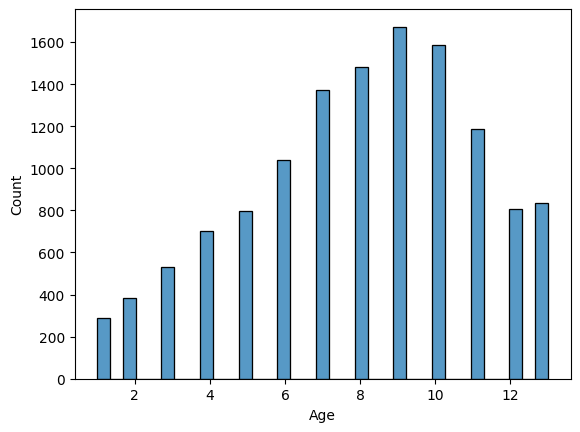

In [7]:
sns.histplot(ana["Age"]);